# Accessing the DB

We have loaded the CSV files into an SQL Database. We ran the necessary queries to create views based on our use case. Now, we wish to access the db through python, to perform further data analysis, and data visualizations

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyodbc

In [ ]:
# Establishing a connection with our SQL Server

conn_str = (
    "Connection to SQL Server :)"
)

conn = pyodbc.connect(conn_str)


print("Connected to SQL Server!")

Connected to SQL Server!


In [ ]:
# Now with the connection open,
# we can fetch our views that were tailor made for our use case

# Getting the arrival date and estimated arrival datedifferences for 2019
query = """
SELECT *
FROM arrival_date_diffs_2019
"""

df = pd.read_sql(query,conn)


In [ ]:
# We verify if our data was brought over successfully
# After checking, we can get to work.
df.head()

,identifier,arrival_date,estimated_arrival_date,days_difference
0,201901051,2019-01-04,2019-01-02,2
1,201901161,2019-01-15,2019-01-11,4
2,201901241,2019-01-23,2019-01-22,1
3,201902180,2019-02-17,2019-02-17,0
4,201903150,2019-03-14,2019-03-09,5


In [15]:
# For this piece of data, I want to group whether the estimated arrival dates for 2019
# were correct.

df['day_diff_group'] = np.select(
    [
        df['days_difference'] > 0,
        df['days_difference'] < 0,
        df['days_difference'] == 0
    ],
    ["Late","Early","On Time"]
)

counts = df['day_diff_group'].value_counts()

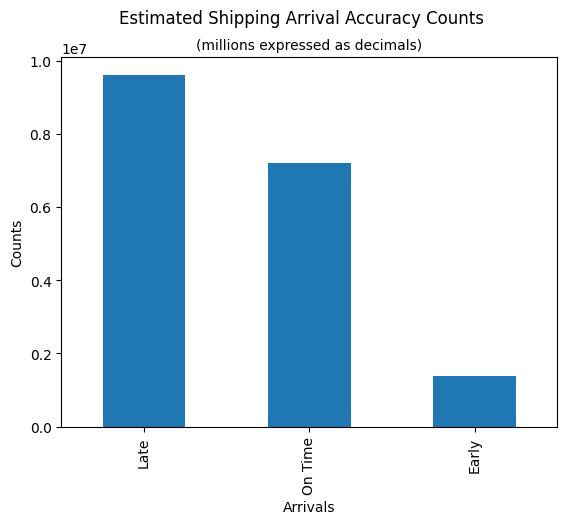

In [21]:
# Now that we've transformed our data into how we want it, we can create a visual

counts.plot(kind='bar')
plt.suptitle("Estimated Shipping Arrival Accuracy Counts")
plt.title("(millions expressed as decimals)",fontsize=10)
plt.xlabel("Arrivals")
plt.ylabel("Counts")
plt.show()

# Conclusion

In the notebook so far, steps were separated as so:
- Connection
- Extraction
- Verification
- Transformation (optional)
- Visualization

Now, we repeat these steps on all our views to create data visualizations for
our presentation.

In [ ]:
query = """
SELECT * 
FROM EstimatedArrivalAccuracyByYear
"""

df = pd.read_sql(query,conn)

In [23]:
df.head()

,shipment_year,total_shipments,avg_signed_error_days,avg_absolute_error_days,late_shipments,early_shipments,on_time_shipments
0,2019,18214364,1.546640,2.287426,9612654,1395230,7206480
1,2020,8532486,4.517646,4.913559,8264180,200359,67947


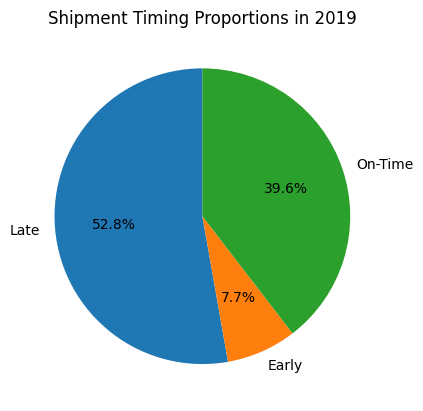

In [26]:

labels = ['Late','Early','On-Time']
sizes = df.loc[df['shipment_year'] == 2019, 
        ['late_shipments','early_shipments','on_time_shipments']].values.flatten()


plt.pie(sizes, labels=labels,autopct="%1.1f%%",startangle=90)
plt.title("Shipment Timing Proportions in 2019")
plt.show()


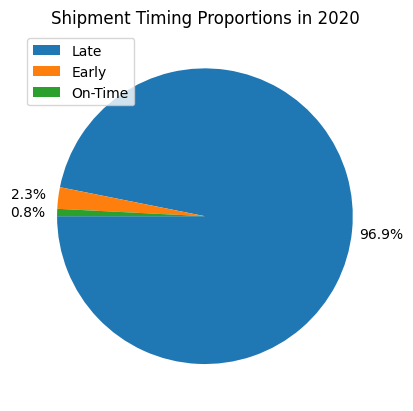

In [33]:
labels = ['Late','Early','On-Time']
sizes = df.loc[df['shipment_year'] == 2020, 
        ['late_shipments','early_shipments','on_time_shipments']].values.flatten()


plt.pie(sizes,autopct="%1.1f%%",startangle=180,pctdistance=1.2)
plt.title("Shipment Timing Proportions in 2020")
plt.legend(labels)
plt.show()

In [ ]:
query = """
SELECT *
FROM ManifestSummaryByYear
"""

df = pd.read_sql(query,conn)

In [36]:
df.head()

,shipment_year,total_shipments,total_containers,avg_containers_per_shipment
0,2019,18214364,24323969763,1335.427894
1,2020,14363141,15259530431,1062.409011


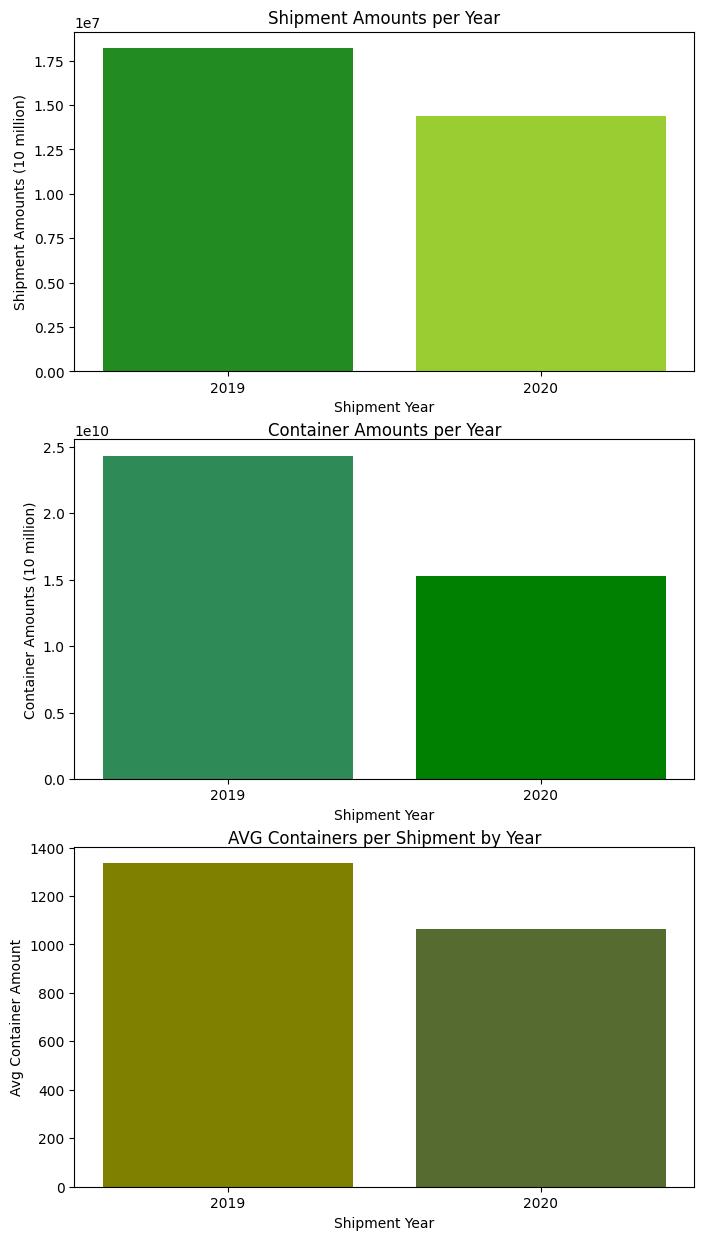

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(8,15))

ax[0].bar(df['shipment_year'].astype(str),df['total_shipments'],color=['forestgreen','yellowgreen'])
ax[0].set_xlabel("Shipment Year")
ax[0].set_ylabel("Shipment Amounts (10 million)")
ax[0].set_title("Shipment Amounts per Year")

ax[1].bar(df['shipment_year'].astype(str), df['total_containers'],color=['seagreen','green'])
ax[1].set_xlabel("Shipment Year")
ax[1].set_ylabel("Container Amounts (10 million)")
ax[1].set_title("Container Amounts per Year",pad=-20)

ax[2].bar(df['shipment_year'].astype(str), df['avg_containers_per_shipment'],color=['olive','darkolivegreen'])
ax[2].set_xlabel("Shipment Year")
ax[2].set_ylabel("Avg Container Amount (Thousands)")
ax[2].set_title("AVG Containers per Shipment by Year",pad=-20)
plt.show()

In [ ]:
query = """
SELECT *
FROM ManifestYoYChange
"""

df = pd.read_sql(query,conn)

In [7]:
coords = pd.read_csv('./city_coordinates.csv')

In [4]:
df.head(10)

,port_of_lading,containers_2019,containers_2020,container_change
0,"Aabenraa,Denmark",44,0,-44
1,"Aalborg,Denmark",10070,1213,-8857
2,"Aalesund,Norway",3483,957,-2526
3,"Aarhus,Denmark",387675,1248,-386427
4,"Aberdeen,United Kingdom",8766,148888,140122
5,"Abidjan,Ivory Coast",901886,620,-901266
6,"Acajutla,El Salvador",6728402,557101,-6171301
7,"Acapulco,Mexico",10406,3,-10403
8,"Adelaide,Australia",23227269,3614790,-19612479
9,"Aden,Yemen",259,2650,2391


In [ ]:
query = """
SELECT *
FROM TopImporters
"""

df = pd.read_sql(query,conn)

In [ ]:
# Top importers
df

,port_unlading_id,port_of_unlading,shipment_count,shipment_year,rn
0,111,"Los Angeles, California",3590701,2019,1
1,137,"New York/Newark Area, Newark, New Jersey",3173393,2019,2
2,108,"Long Beach, California",2799283,2019,3
3,189,"Savannah, Georgia",1185382,2019,4
4,93,"Houston, Texas",1026278,2019,5
5,201,"Tacoma, Washington",975411,2019,6
6,141,"Norfolk, Virginia",864652,2019,7
7,39,"Charleston, South Carolina",841220,2019,8
8,192,"Seattle, Washington",604851,2019,9
9,142,"Oakland, California",595243,2019,10


In [ ]:
query = """
SELECT *
FROM TopPorts
"""

df = pd.read_sql(query,conn)

In [69]:
# Top exporters
df

,port_lading_id,port_of_lading,shipment_count,shipment_year,rn
0,885,"Shanghai ,China (Mainland)",2188650,2019,1
1,1157,"Yantian,China (Mainland)",2014912,2019,2
2,597,"Ningpo ,China (Mainland)",1251361,2019,3
3,766,"Pusan,South Korea",1241918,2019,4
4,399,"Kaohsiung,China (Taiwan)",714287,2019,5
5,354,"Hong Kong,Hong Kong",606136,2019,6
6,137,"Bremerhaven,Federal Republic of Germany",594267,2019,7
7,1116,"Vung Tau,Vietnam",589389,2019,8
8,1151,"Xiamen,China (Mainland)",515792,2019,9
9,901,"Singapore,Singapore",512420,2019,10


In [ ]:
query = """
SELECT * 
FROM TopPortsByContainers
"""

df = pd.read_sql(query,conn)

In [71]:
df

,shipment_year,port_of_lading,total_containers,rn
0,2019,"Yantian,China (Mainland)",2762040862,1
1,2019,"Shanghai ,China (Mainland)",2178045142,2
2,2019,"Ningpo ,China (Mainland)",1791786126,3
3,2019,"Pusan,South Korea",1368163255,4
4,2019,"Kaohsiung,China (Taiwan)",1217470916,5
5,2019,"Tsingtao,China (Mainland)",787714812,6
6,2019,"Laem Chabang,Thailand",760349461,7
7,2019,"Singapore,Singapore",743896806,8
8,2019,"Santo Domingo,Dominican Republic",719956595,9
9,2019,"Tokyo ,Japan",646902692,10


In [15]:
yoy_change_df = pd.read_csv('../additional_csvs/manifest_yoy_change_w_coordinates.csv')

In [20]:
idx = yoy_change_df.idxmax()

yoy_change_df.iloc[idx]

,port_of_lading,containers_2019,containers_2020,container_change,lat,lng
375,"Zonguldak,Turkey",1635774,0,-1635774,41.4564,31.7986
292,"Singapore,Singapore",743896806,256,-743896550,1.3000,103.8000
264,"Salford,United Kingdom",33868,1532283000,1532249132,53.4830,-2.2931
264,"Salford,United Kingdom",33868,1532283000,1532249132,53.4830,-2.2931
321,"Tiksi,Russia",116,73813505,73813389,71.6269,128.8350
366,"Whakatane,New Zealand",153848,0,-153848,-37.9640,176.9840


In [ ]:
import folium
from folium.plugins import HeatMap

# Heat map creation
# Green means a positive change, these ports received more shipments from 2019 to 2020
# Purple means a negative change, these ports received less shipments from 2019 to 2020

min_change = yoy_change_df['container_change'].min()

heat_data = [
    [float(row['lat']), float(row['lng']), float(row['container_change'] - min_change)]
    for idx, row in yoy_change_df.iterrows()
]

max_val = max([x[2] for x in heat_data])

m = folium.Map(location=[20, 0], zoom_start=2)
HeatMap(
    heat_data,
    min_opacity=0.3,
    max_val=max_val,
    radius=8,
    blur=15
).add_to(m)

m.save('heatmaptwo.html')


